In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [23]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'ML-Projects/semantic-cityscapes/'

Mounted at /content/gdrive


In [0]:
#import os
#os.getcwd()
#os.chdir('/content/gdrive/My Drive/ML-Projects/semantic-cityscapes/data')

In [0]:
from fastai import *
from fastai.vision import *
import os
from glob import glob

In [0]:
#%%bash
#unzip -q val.zip -d image/

## Rename the image files so that mask and images have same name

In [0]:
images = glob(base_dir + 'data/image/**/**/*leftImg8bit.png')

for img in images:
  new = img.replace("leftImg8bit.png", "gtFine_color.png")
  os.rename(img,new)
  #print(img)

## Next

In [0]:
images = glob(base_dir + 'data/image/**/**/*gtFine_color.png')

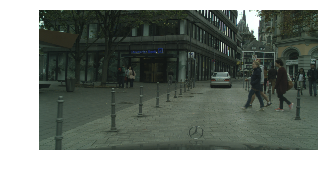

In [30]:
img = images[0]
img = open_image(img)
img.show(figsize=(5,5))

In [0]:
src_size = np.array(img.shape[1:])


In [56]:
size = src_size//2
bs = 8
size, bs

(array([ 512, 1024]), 8)

In [0]:
free = gpu_mem_get_free_no_cache()
# the max size of bs depends on the available GPU RAM
if free > 8200: bs=8
else:           bs=4
print(f"using bs={bs}, have {free}MB of GPU RAM free")

## Labels

In [0]:
codes= [
	Label('unlabelled', (0,0,0)),
	Label('dynamic', (111, 74,  0)),
	Label('ground', ( 81,  0, 81)),
	Label('road', (128, 64,128)),
	Label('sidewalk', (244, 35,232)),
	Label('parking', (250,170,160)),
	Label('rail track', (230,150,140)),
	Label('building', ( 70, 70, 70)),
	Label('wall', (102,102,156)),
	Label('fence', (190,153,153)),
	Label('guard rail', (180,165,180)),
	Label('bridge', (150,100,100)),
	Label('tunnel', (150,120, 90)),
	Label('pole', (153,153,153)),
	Label('traffic light', (250,170, 30)),
	Label('traffic sign', (220,220,  0)),
	Label('vegetation', (107,142, 35)),
	Label('terrain', (152,251,152)),
	Label('sky', ( 70,130,180)),
	Label('person', (220, 20, 60)),
	Label('rider', (255,  0,  0)),
	Label('car', (0,  0,142)),
	Label('truck', (0,  0, 70)),
	Label('bus', (0, 60,100)),
	Label('caravan', (0,  0, 90)),
	Label('trailer', (0,  0,110)),
	Label('train', (0, 80,100)),
	Label('motorcycle', ( 0,  0,230)),
	Label('bicycle', (119, 11, 32))
	]

## Load data

In [0]:
path= Path(base_dir)

In [0]:
image_path = Path(base_dir+'data/image/')
mask_path = Path(base_dir+'data/mask/')

In [0]:
image_path = os.(base_dir + 'data/image/')
mask_path = os.(base_dir + 'data/mask/')

In [0]:
image_path = glob(base_dir + 'data/image/**/**/*gtFine_color.png')
mask_path = glob(base_dir + 'data/mask/**/**/*gtFine_color.png')

In [48]:
image_path.ls()

[PosixPath('/content/gdrive/My Drive/ML-Projects/semantic-cityscapes/data/image/train'),
 PosixPath('/content/gdrive/My Drive/ML-Projects/semantic-cityscapes/data/image/val')]

In [77]:
src = (SegmentationItemList.from_folder(image_path)
       .split_by_folder(train='train', valid='val')
       .label_from_folder(mask_path))

TypeError: ignored

In [0]:
help(SegmentationItemList)

In [0]:
data = (src.transform(get_transforms(), size=size, tfm_y=True)
        .databunch(bs=bs)
        .normalize(imagenet_stats))